# ••**Clausrum Neurones Simulations**••

Neurones Subtypes 




In [59]:
from brian2 import *
import matplotlib.pyplot as plt




In [60]:
# PN1 -- Variation 1


parameters = {
    "c_m": 200 * pF,
    "g_l": (1/246.92) * nS,   # VAriable
    "e_l": -73.54 * mV,    # VAriable
    "v_t": -35.6 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 10.0 * pA,
    "v_r": (-35.6-5) * mV,  # VAriable
    "i_stim": (117.34*2) * pA,  # VAriable
}


In [61]:
# parameters = {
#     "c_m": 210 * pF,
#     "g_l": (1/246.92) * nS,   # VAriable
#     "e_l": -73.54 * mV,    # VAriable
#     "v_t": -35.7 * mV,
#     "d_t": 2.0 * mV,
#     "a": 2.0 * nS,
#     "tau_w": 300.0 * ms,
#     "b": 60.0 * pA,
#     "v_r": (-35.7-5) * mV,  # VAriable
#     "i_stim": (117.34*2) * pA,  # VAriable
# }

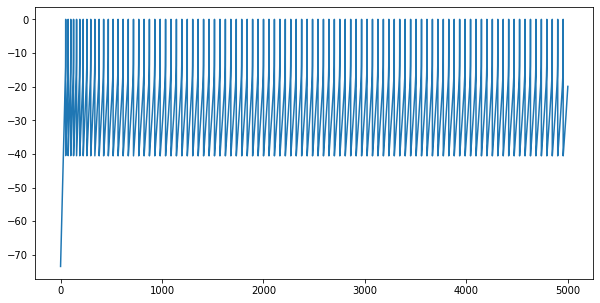

In [62]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > 0*mV", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(5 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.figure(figsize=(10, 5))
plt.plot(states[0].t / ms, vms)



plt.show()


PN2


In [63]:
# PN1 -- Variation 1


parameters = {
    "c_m": 200 * pF,
    "g_l": (1/173) * nS,   # VAriable, from paper
    "e_l": -74.5 * mV,    # VAriable from paper
    "v_t": -35.7 * mV, # from paper 
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-35.7-5) * mV,  # VAriable from paper 
    "i_stim": (216*2) * pA,  # VAriable from paper 
}


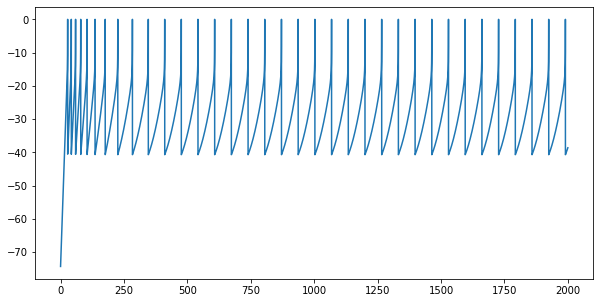

In [64]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > 0*mV", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(2 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
fig = plt.figure(figsize=(10, 5))

plt.plot(states[0].t / ms, vms)


plt.show()

PN3

In [65]:


parameters = {
    "c_m": 100 * pF,
    "g_l": (1/222) * nS,   # VAriable
    "e_l": -71.2 * mV,    # VAriable
    "v_t": -36.8 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-36.8-5) * mV,  # VAriable
    "i_stim": (125*2) * pA,  # VAriable
}

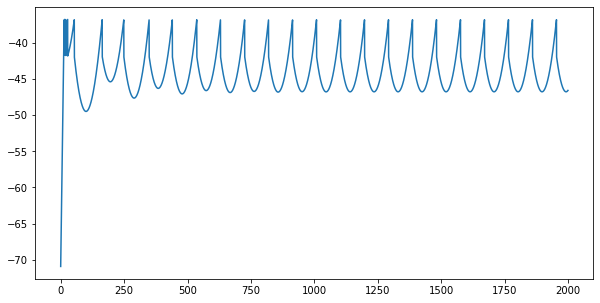

In [66]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > v_t", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(2* second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
# plt.ylim(-80, -10)
# plt.figure(figsize=(6,3),dpi=1440)
# plt.figure(figsize=(10,5))
# plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))

plt.plot(states[0].t / ms, vms)

# plt.figure(figsize=(6, 3))
# fig.suptitle('adaptation')

# plt.ylim(-80, -10)
plt.show()

PN4

In [67]:
parameters = {
    "c_m": 150 * pF,
    "g_l": (1/244) * nS,   # VAriable
    "e_l": -70.4 * mV,    # VAriable
    "v_t": -34.5 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 300.0 * ms,
    "b": 60.0 * pA,
    "v_r": (-35.4-5) * mV,  # VAriable
    "i_stim": (118*2) * pA,  # VAriable
}

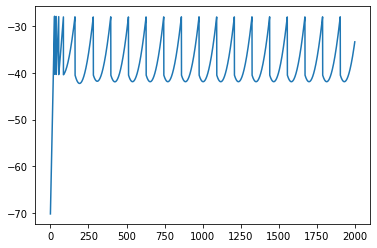

In [68]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > -28*mV", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(2 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)


plt.show()

PN5

In [69]:
parameters = {
    "c_m": 100 * pF,
    "g_l": (1/488) * nS,   # VAriable
    # Resting Potential
    "e_l": -68.1 * mV,    # VAriable
    "v_t": -28.1 * mV,
    "d_t": 1.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 200.0 * ms,
    "b": 50.0 * pA,
    "v_r": (-34.5-5) * mV,  # VAriable
    "i_stim": (49.4*2) * pA,  # VAriable
}

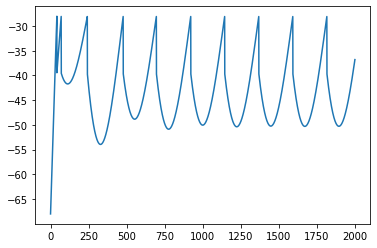

<Figure size 720x360 with 0 Axes>

In [70]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > v_t", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 0.1 * ms
run(2 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)

fig = plt.figure(figsize=(10, 5))
fig.suptitle('PN 5')

plt.show()

In [71]:
# PN1 -- Variation 1


parameters = {
    "c_m": 100 * pF,
    "g_l": (1/755) * nS,   # VAriable
    "e_l": -64.9 * mV,    # VAriable
    "v_t": -35.6 * mV,
    "d_t": 2.0 * mV,
    "a": 2.0 * nS,
    "tau_w": 200.0 * ms,
    "b": 10 * pA,
    "v_r": (-41.7-5) * mV,  # VAriable
    "i_stim": (30*2) * pA,  # VAriable
}

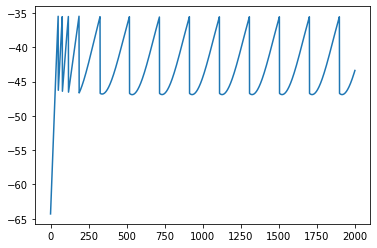

In [72]:
eqs = """
    dvm/dt = (g_l*(e_l - vm) + g_l*d_t*exp((vm-v_t)/d_t) + i_stim - w)/c_m : volt
    dw/dt  = (a*(vm - e_l) - w)/tau_w : amp
    """
neuron = NeuronGroup(
    1,
    model=eqs,
    threshold="vm > v_t", reset="vm = v_r; w += b",
    method="euler",
    namespace=parameters,
)
neuron.vm = parameters["e_l"]
neuron.w = 0
states = StateMonitor(neuron, ["vm", "w"], record=True, when="thresholds")
defaultclock.dt = 1 * ms
run(2 * second)
# clip membrane voltages to threshold (0 mV)
vms = np.clip(states[0].vm / mV, a_min=None, a_max=0)
plt.plot(states[0].t / ms, vms)


plt.show()